## Del 1: k-NN i Python

Dette dokument indeholder nogle implementationer af k-NN modellen med nogle tilhørende opgaver. Formålet er at give en intuition for hvordan modellen virker, så man har et eksempel på en klassisk machine learning model.

Det anbefales at bruge kapitlet om k-NN modellen fra kompendiet som opslagsværk til at forstå modellen på konceptplan, mens man forsøger at løse opgavere.

In [1]:
# Her er blot en celle til at importere pakker, før alt det andet kode bliver kørt
import numpy as np
import matplotlib.pyplot as plt
import math

#### Opgave 0

Dette er en ekstraopgave fra intro til programmering, som er et meget fint, men ikke nødvendigt udgangspunkt for resten af opgaverne her.

Opgave 0.1: Løs opgaven 12 på CodeJudge kaldet k nærmeste naboer.

#### Opgave 1 (svær)

Den første opgaver er at bygge sin egen implementation af k-NN modellen fra bunden af. Her kan man benytte sig af skelettet af kommentarer i nedenstående celle. Denne opgave er betydeligt sværere end resten af opgaverne i dokumentet, så spørg endelig om hjælp, eller spring over den, for eventuelt at vende tilbage til den senere.

1.1: Lav en implementation af k-NN algoritmen som beskrevet i kompendiet


In [2]:
# 1: Lav nogle klasser/labels, som data kan tilhøre


# 2: Lav et træningssæt, der er delt op i klasser/labels


# 3: Lav et testsæt


# 4: Lav en funktion der kører selve k-NN algoritmen


# 5: Plot og print resultater

#### Implementation 1:

Her kommer en implementation af k-NN algoritmen med 2 klasser, hvor træningsdataen for de 2 klasser med vilje er forskudt, sådan at det bliver tydeligt at se resultaterne af k-NN algoritmen. Cellerne nedenfor laver og plotter datasæt

Implementationen af k-NN algoritmen anvender nogle programmeringstekniske koncepter, som i ikke er blevet introduceret til. Længere nede kan i finde en implementation, som bruger ting i har set før, men den er noget mere snørklet.

In [3]:
# Her defineres en funktion til at generere datasæt
def generate_data():
    np.random.seed(0)
    # Klasse -1
    points_neg = np.random.randn(50, 2) - 1  # Flytter denne klump til venstre
    labels_neg = -1 * np.ones(50)

    # Klasse 1
    points_pos = np.random.randn(50, 2) + 1  # Flytter denne klump til højre
    labels_pos = np.ones(50)

    # Samle træningsdata
    all_points = np.vstack((points_neg, points_pos))
    all_labels = np.concatenate((labels_neg, labels_pos))

    test_indices = np.random.choice(np.arange(len(all_points)),size=20, replace=False) # 20 test points
    test_points = all_points[test_indices]
    test_labels = all_labels[test_indices]
    
    train_mask = np.full(len(all_points), True)
    train_mask[test_indices] = False
    training_points = all_points[train_mask]
    training_labels = all_labels[train_mask]        

    return training_points, training_labels, test_points, test_labels

training_points, training_labels, test_points, test_labels = generate_data()

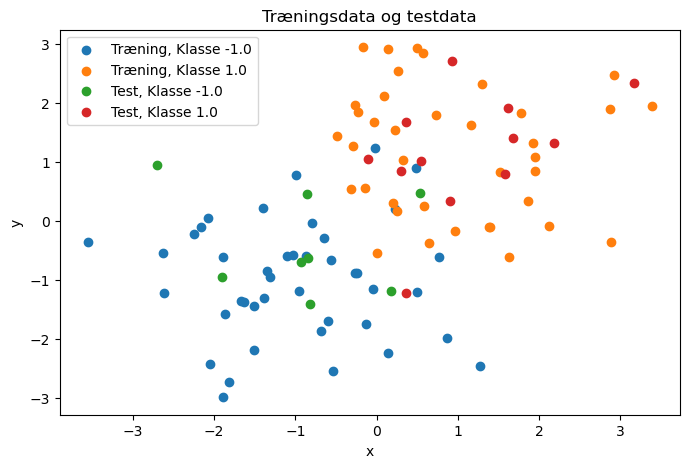

In [4]:
# Her defineres en funktion til at plotte træningsdata og testdata
def plot_training_data(training_points, training_labels):
    plt.figure(figsize=(8, 5))
    # Plot punkter baseret på deres /klasserlabels
    for label in np.unique(training_labels):
        # Vælg alle punkter med den aktuelle klasse/label
        subset = training_points[training_labels == label]
        plt.scatter(subset[:, 0], subset[:, 1], label=f'Træning, Klasse {label}')

    for label in np.unique(test_labels):
        # Vælg alle punkter med den aktuelle klasse/label
        subset = test_points[test_labels == label]
        plt.scatter(subset[:, 0], subset[:, 1], label=f'Test, Klasse {label}')


    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Træningsdata og testdata')
    plt.show()

plot_training_data(training_points, training_labels)

In [5]:
# Her defineres selve k-NN algoritmen
def KNN_numpy(training_points, training_labels, test_points, k):
    
    classifications = []

    for test_point in test_points:
        # Beregner afstand mellem hvert testpunkt og træningspunkt
        differences = training_points - test_point
        euclidean_distances = np.sqrt(np.sum(differences**2, axis=1))

        sorted_indices = np.argsort(euclidean_distances, axis=0)

        num_positives = np.sum(training_labels[sorted_indices][:k] == 1)
        num_negatives = np.sum(training_labels[sorted_indices][:k] == -1)
        pred = -1 if num_negatives > num_positives else 1

        classifications.append(pred)

    return classifications

In [6]:
#Her defineres en funktion der plotter resultaterne af den første implementation af k-NN algoritmen
def plot_knn_results(training_points, training_labels, test_points, predicted_labels, test_labels):
    
    plt.figure(figsize=(8, 5))
    
    # Plot træningspunkter
    for label in np.unique(training_labels):
        subset = training_points[training_labels == label]
        plt.scatter(subset[:, 0], subset[:, 1], label=f'Training class {label}')
    
    # Plot testpunkter
    for label in np.unique(predicted_labels):
        correct_indices = (predicted_labels == label) & (predicted_labels == test_labels)
        incorrect_indices = (predicted_labels == label) & (predicted_labels != test_labels)
        
        # Korrekt klassificerede punkter
        correct = test_points[correct_indices]
        plt.scatter(correct[:, 0], correct[:, 1], c='green' if label == -1 else 'red', marker='o', edgecolors='black', alpha=0.6, label=f'Korrekt klassificeret punkt {label}')
        
        # Forkert klassificerede punkter
        incorrect = test_points[incorrect_indices]
        plt.scatter(incorrect[:, 0], incorrect[:, 1], c='green' if label == -1 else 'red', marker='x', edgecolors='black', alpha=0.6, label=f'Forkert klassificeret punkt {label}')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('k-NN klassificering resultater')
    plt.show()

C:\Users\Bruger\AppData\Local\Temp\ipykernel_12496\2256580872.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(incorrect[:, 0], incorrect[:, 1], c='green' if label == -1 else 'red', marker='x', edgecolors='black', alpha=0.6, label=f'Forkert klassificeret punkt {label}')


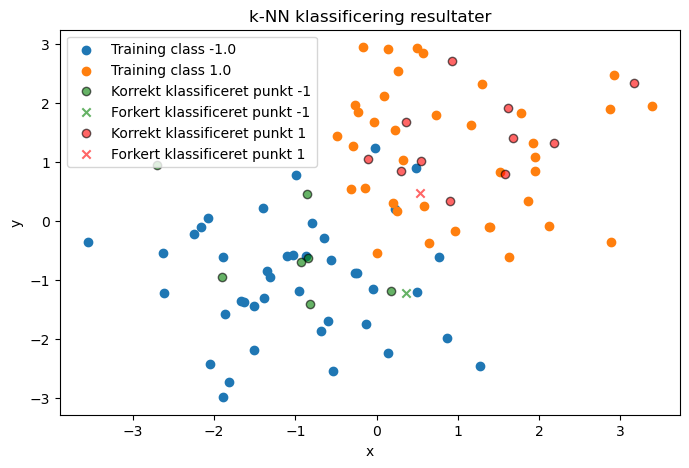

In [17]:
# Brug din k-NN funktion til at klassificere testpunkterne

k = 5

# Her køres k-NN algoritmen på datasæt
predicted_labels = KNN_numpy(training_points, training_labels, test_points, k=k)

# Plot resultater
plot_knn_results(training_points, training_labels, test_points, predicted_labels, test_labels)

#### Opgave 2

Denne opgave handler om at teste k-NN modellen af på forskellige parametre. Her kan man både prøve at teste sig egen implementation af og/eller teste den givne implementation af.

2.1: Prøv at test forskellige værdier for training_points, training_labels, test_points, predicted_labels og k. Hvad sker der når man ændre markant på nogle af disse parametre? Hvad sker der hvis vi tilføjer mange datapunkter?

2.2: Prøv at ændre på antallet af labels

2.3: Beregn error rate af modellen. Test igen for forskellige parametre

#### Implementation 2

Her kommer en implementation af k-NN algoritmen, som anvender de koncepter i har set. Den er dog betydeligt mere omstændig, så det anbefales primært at bruge implementationen ovenfor. Den indeholder desuden nogle få fejl og mangler idet den eksempelvis ikke viser, hvilke punkter der er blevet klassificeret korrekt, og hvilke der ikke er blevet klassificeret korrekt

For at køre implementationen skal man blot fjerne kommentarene. Dette kan gøres smart ved at markere det hele og så trykke ctrl + shift + 7

In [8]:
# # Blot en funktion til at beregne distancer mellem punkter
# def euclidean_distance(x1, x2):
#     distance = np.sqrt(np.sum((x1 - x2) ** 2))
#     return distance

# # Her defineres selve k-NN algoritmen men med ting i har lært om før
# def knn_classify(training_points, training_labels, test_points, k):
#     predictions = []
#     for test_point in test_points:
#         distances = []
#         for train_point in training_points:
#             # Beregner distance mellem testpunkt og hvert træningspunkt 
#             distance = euclidean_distance(test_point, train_point)
#             distances.append(distance)

#         # Opretter en liste med indices og distancer
#         index_distance_pairs = []
#         for i in range(len(distances)):
#             pair = (i, distances[i])
#             index_distance_pairs.append(pair)

#         # Brug Pythons sort function/method i stedet for denne her sort
#         # Sorterer indices efter distance
#         for i in range(len(index_distance_pairs)):
#             for j in range(i + 1, len(index_distance_pairs)):
#                 if index_distance_pairs[i][1] > index_distance_pairs[j][1]:
#                     # Ombytter rækkefølge
#                     index_distance_pairs[i], index_distance_pairs[j] = index_distance_pairs[j], index_distance_pairs[i]
        
#         # Gemmer de k nærmeste indices fra den sorterede liste
#         nearest_indices = []
#         for i in range(k):
#             index = index_distance_pairs[i][0]  # Hent indexet fra parret ved position 'i'
#             nearest_indices.append(index)

#         # Gemmer klasserne/labels fra de k nærmeste naboer
#         nearest_labels = []
#         for i in nearest_indices:
#             nearest_labels.append(training_labels[i])

#         # Tæl antallet af gange hver klasse/label optræder inden for de k naboer
#         label_count = {}
#         for label in nearest_labels:
#             if label in label_count:
#                 label_count[label] += 1
#             else:
#                 label_count[label] = 1
        
#         # Bestemmer klasse/label for testpunktet baseret på den dominerende klasse/label blandt naboer
#         max_count = -1
#         predicted_label = None
#         for label, count in label_count.items():
#             if count > max_count:
#                 max_count = count
#                 predicted_label = label
        
#         predictions.append(predicted_label)

#     return predictions

In [9]:
# #Her defineres en funktion der plotter resultaterne af k-NN algoritmen
# def plot_knn_results_ugly_implementation(training_points, training_labels, test_points, predicted_labels):
#     plt.figure(figsize=(8, 5))
#     # Plot training points
#     for label in np.unique(training_labels):
#         subset = training_points[training_labels == label]
#         plt.scatter(subset[:, 0], subset[:, 1], label=f'Træning klasse {label}')
#     # Plot test points
#     for label in np.unique(predicted_labels):
#         subset = test_points[predicted_labels == label]
#         plt.scatter(subset[:, 0], subset[:, 1], label=f'Test klasse {label}', alpha=0.6)
    
#     plt.xlabel('x')
#     plt.ylabel('y')
#     plt.legend()
#     plt.title('k-NN klassifikation resultater')
#     plt.show()

In [10]:
# # Kører k-NN for implementation nummer 2
# predicted_labels = knn_classify(training_points, training_labels, test_points, k=k)

# # Plotter resultater for implementation nummer 2
# plot_knn_results_ugly_implementation(training_points, training_labels, test_points, predicted_labels)

#### Opgave 3

Denne opgave handler om at udvide k-NN modellen. Man kan tage udgangspunkt i sin egen implementation og/eller den givne implementation.

3.1: Prøv at tilføj flere labels, så der er flere end 2 og se hvad der sker

3.2: Prøv at udvid modellen med en dimension, så den går fra at være i 2 dimensioner til at være i 3 dimensioner. Dette kan være ens egen implementation, eller den der er givet. Print resultaterne i stedet for at plotte dem

3.3 Prøv at udvid modellen til n dimensioner

#### Implementation 3: fra nettet med pakker

Her er en implementation der bruger pakken sklearn. Den er blot hentet fra nettet, så vi er ikke så meget inde i implementationen. Den er her bare for at se hvordan k-NN modellen ser ud med sklearn.

In [11]:
# from collections import Counter
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from matplotlib.colors import ListedColormap


# print(training_points.shape)
# print(training_labels.shape)
# print(test_points.shape)

# print(test_points[0].shape)

# print(training_points - test_points[0])

# print(float(round(np.mean(np.random.permutation(training_labels)[:10]))))

# print(float(round(-0.1)))


In [12]:
# def euclidean_distance(x1, x2):
#     distance = np.sqrt(np.sum((x1-x2)**2))
#     return distance

# class KNN:
#     def __init__(self, k=3):
#         self.k = k

#     def fit(self, X, y):
#         self.X_train = X
#         self.y_train = y

#     def predict(self, X):
#         predictions = [self._predict(x) for x in X]
#         return predictions

#     def _predict(self, x):
#         # compute the distance
#         distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
#         # get the closest k
#         k_indices = np.argsort(distances)[:self.k]
#         k_nearest_labels = [self.y_train[i] for i in k_indices]

#         # majority vote
#         most_common = Counter(k_nearest_labels).most_common()
#         return most_common[0][0]

In [13]:
# cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

# iris = datasets.load_iris()
# X, y = iris.data, iris.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# plt.figure()
# plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
# plt.show()


# clf = KNN(k=5)
# clf.fit(X_train, y_train)
# predictions = clf.predict(X_test)

# print(predictions)

# acc = np.sum(predictions == y_test) / len(y_test)
# print(acc)

In [14]:
# #Her kan man printe og plotte datasættet

# #print(training_points)
# plt.scatter(training_points[:,0], training_points[:,1]);
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.title('Træningsdata')
# plt.show()

## Del 2: Lineær regression i Python

Nu har I set lineær regression som matematik. Det er faktisk ikke alt for svært at skrive op i Python..., husk at formlen for en prediciton i lineær regression er følgende:

$$\hat{\mathbf{y}} = \mathbf{X}\hat{\boldsymbol{\beta}}$$

Dette er selvfølgelig lidt forskelligt fra det rigtige (orakel) som genererer dataen:

$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$

Men den kan vi jo som ML udviklere ikke finde... så wgaf?

Vi kan dog finde et **estimat** for de rigtige vægte. Det er altså estimatoren som minimerer den kvadrerede fejl $\|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2$, denne findes for lineær regression ved følgende formel:

$$\widehat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}$$

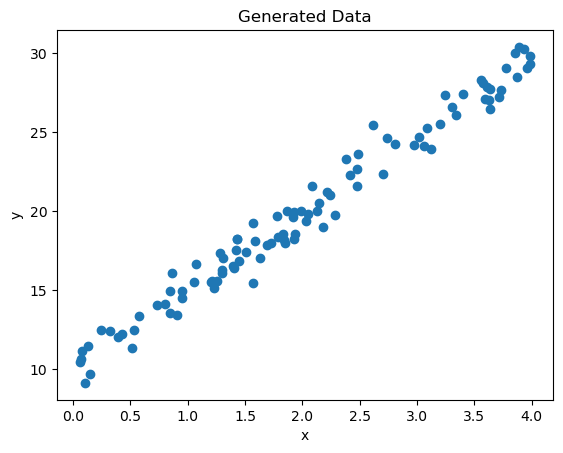

In [15]:
# Bare hvor vores features skal vaere indholdt i
fro, to = (0, 4)

# Saet et seed for at goere koden reproducerbar
np.random.seed(69420)

# Generer noget data ud fra a * x + b + epsilon hvor epsilon er tilfaeldig stoej
n_samples = 100
features = to * np.random.rand(n_samples, 1)

# Hældning og skæring med y-aksen for orakel funktionen (vi antager vi ikke kender disse i et ML eksempel)
a = 5 
b = 10

# Varians of mean for den støj som indgår i orakel funktionen
variance = 1
mean = 0

# Generering af støj
epsilon = variance * np.random.randn(n_samples, 1) + mean
# Generering af data
y = a * features + b + epsilon

# Tilføj en bias column, dvs bare at tilføje skæring med y aksen
etter_vektor = np.ones((n_samples, 1))
X = np.hstack((etter_vektor, features))

# Plot data
plt.scatter(features, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Genereret data")
plt.show()

In [16]:
# Udregn de bedste vægte givet formlen ovenover, husk X er din data og y er dine labels

# best_weights = # JERES KODE HER

print("Optimal weights (theta):", best_weights)

# Benyt vægtene til at lave predictions 
X_new = np.linspace(fro, to, 200).reshape(-1, 1)
X_new_b = np.hstack((np.ones((200, 1)), X_new))

y_predict = X_new_b @ best_weights

# Plot predictions
plt.plot(X_new, y_predict, "r-", label="Forudsigelser")
plt.scatter(features, y)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Lineær regression forudsigelser")
plt.show()

NameError: name 'best_weights' is not defined

#### Opgave 4

I skal nu finde de optimale vægte til den lineære regressionsmodel, og derefter undersøge lidt om den

4.1: Færdiggør koden så de optimale vægte bliver udregnet. Her kan I referere til formlen for bedste estimator lige ovenover.

4.2: Leg rundt med støjen af modellen. Dvs. pil ved både **mean** og **variance** som bliver brugt til at udregne epsilon. Hvad gør en højere mean? Gør den overhovedet vores model værre/bedre? Hvad gør en højere varians? Hvorfor/Hvorfor ikke er én vigtigere end den anden når det kommer til at predicte dataen. 

4.3 Prøv at ændre på formlen (oraklet) for hvordan dataen genereres til at inkludere ikke-lineære led, såsom:

$$f(x) = a\cdot x^2 + b\cdot x +c$$

Eller

$$f(x) = a\cdot sin(x) + b$$

Kan modellen stadig nogenlunde forudsige dataen... hvorfor, hvorfor ikke?

4.4 (Ekstra) Prøv nu at tilføje en ekstra feature til modellen der svarer til det nye led i orakel funktionen, forbedrer dette på dine predictions?

*HINT*: Evt prøv at bruge koden allerede skrevet til at tilføje skæring med y-aksen, altså alle de ekstra 1'ere.

## Ridge regression

Dette vi gjorde lige før giver os den såkaldte BLUE (Best Linear **Unbiased** Estimator). Det er det bedste vi kan få uden at tilføje bias til modellen.

Fun fact: Ridge regression **tilføjer Bias** for at **fjerne** **Varians**, hvad er Bias og Varians? Søg på det på nettet hvis I vil, det er ikke vigtigt at vide nu.

In any case, gives formlen for den bedste ridge regression estimator som:

$$\widehat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1}\mathbf{X}^T \mathbf{y}$$

Så altså meget lig hvad vi havde før, bare med en ekstra "shrinkage" parameter tilføjet som bestemmer hvor meget store vægte bliver straffet. $\lambda$ er en parameter vi selv må styre hvad er, jo højere den er, jo højere bliver store vægte straffet og jo mere "kedelig" vil modellen se ud. Der er ingen fast matematisk formel for hvad $\lambda$ præcis skal være, så vi må ty til den age-old, tried and tested machine learning unikke skill: **At gætte og se hvordan det passer**.

*Hint*: For at lave identitetsmatricen i Python kan du benytte **np.eye(2)** (vil i dette tilfælde lave en 2x2 identitetsmatrix)

In [ ]:
# Lambda parameter, bestemmer hvor meget store vægte bliver straffet (Python vil ikke lade os kalde den lambda)
lambd = 1

# Udregn de bedste vægte givet formlen ovenover, husk X er din data og y er dine labels
best_weights_ridge = # JERES KODE HER

print("Optimal weights (theta):", best_weights)

# Benyt disse nye vægte til at lave forudsigelser 
X_new = np.array([[fro], [to]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b @ best_weights_ridge

# Plot forudsigelser
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.scatter(features, y)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Predictions")
plt.show()

#### Opgave 5

Lineær regression og ridge regression ligger rigtigt meget op ad hinanden, alligevel er det smart at vide præcis hvad det er som adskiller dem

5.1: Ligesom før, færdiggør koden sådan at den korrekt udregner de optimale vægte givet formlen for ridge regression

5.2: Pil denne gang ved $\lambda$ parameteren (lambd), sæt den meget lavt (ikke negeativt, please) og meget højt, hvilken forskel gør det for modellen når resultaterne plottes?

5.3: Ligesom før, tilføj så en masse ekstra features til modellen, har ridge regression nu en meget mere udsøgt fordel end normal lineær regression tidligere?